In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Read image

In [2]:
img = cv2.imread('lena_grayscale.png',cv2.IMREAD_GRAYSCALE)

In [3]:
img.shape

(256, 256)

In [24]:
img[0:100,0:100] = 0

In [52]:
cv2.imshow('image',img)
cv2.waitKey(0)
#cv2.destroyWindow()

-1

Write image

In [53]:
cv2.imwrite('test-image-enh.png',img)

True

Calculate histogram

In [47]:
histr=cv2.calcHist([img],[0],None, [256], [0,256])

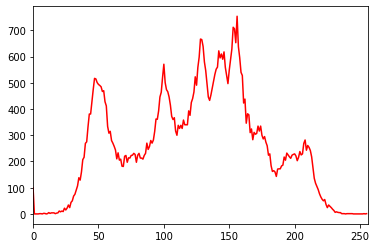

In [48]:
plt.plot(histr,color = 'red')
plt.xlim([0,256])
plt.show()


In [5]:
img = img.T

In [7]:
img[200:255,200:255] = 0

shuffle

In [4]:
np.random.shuffle(img)

In [5]:
img.shape

(256, 256)

image flip

In [11]:
img1 = cv2.flip(img, -1) #0, 1 and -1

In [46]:
cv2.imshow('image',img1)
cv2.waitKey(0)
#cv2.destroyWindow()

-1

image resize

In [10]:
img1 = cv2.resize(img,(2*img.shape[0], 2*img.shape[1]),interpolation = cv2.INTER_LINEAR)

# Affine transformations

translation

In [12]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])

In [13]:
img1 = cv2.warpAffine(img,M,(cols,rows))

reflection as an affine transform

In [31]:
input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
output_pts = np.float32([[cols-1,0], [0,0], [cols-1,rows-1]])
 
# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts , output_pts)
img1 = cv2.warpAffine(img, M, (cols,rows))

playing with affine transforms

In [28]:
input_pts = np.float32([[0,0], [cols-1,0], [0,rows-1]])
output_pts = np.float32([[0,100],[cols-1,0], [0,rows-1]])
 
# Calculate the transformation matrix using cv2.getAffineTransform()
M= cv2.getAffineTransform(input_pts , output_pts)
img1 = cv2.warpAffine(img, M, (cols,rows))

rotation

In [43]:
M = cv2.getRotationMatrix2D((cols/1.5,rows/1.5),90,1)
img1 = cv2.warpAffine(img, M, (cols,rows))

# Image filtering

smoothing

In [58]:
img1 =cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

contrast enhancement

In [49]:
equ = cv2.equalizeHist(img)

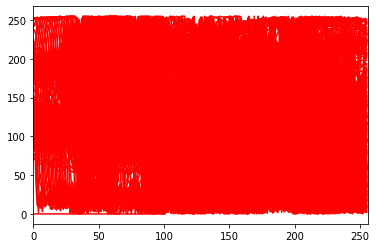

In [50]:
plt.plot(equ,color = 'red')
plt.xlim([0,256])
plt.show()


In [51]:
img1 = equ

In [54]:
equ.shape

(256, 256)

In [55]:
cv2.imshow('image',equ)
cv2.waitKey(0)
#cv2.destroyWindow()

-1

In [56]:
cv2.imwrite('test-image-enh.png',equ)

True